In [ ]:
import pickle, os
import numpy as np
import sys
import skimage as ski
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
import geopandas as gpd

# Linux  
#root_dir = f"/home/adriano/projeto_mestrado/modules"
#sys.path.insert(0, "/home/adriano/projeto_mestrado/modules")

# Windows  
root_dir = Path(r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")
sys.path.insert(0, r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")

from Background import background_generation as backgen
import functions

img_dir = f'{root_dir}/Images/retina/cutouts/training'
img_label = f'{root_dir}/Images/retina/cutouts/labels'

images_vector = functions.read_directories(img_dir)
label_vector = functions.read_directories(img_label)

print(mask_vector)

#for i in range(len(images_vector)):
for i in range(1):

    img = np.array(Image.open(f'{img_dir}/{images_vector[i]}'))
    mask = np.array(Image.open(f'{img_label}/{label_vector[i]}'))
    mask = np.array(Image.open('result.png'))
    
    cut = backgen.remove_artifacts2(img,mask)

    # Converting to Pillow Image
    cutout = Image.fromarray(cut)

    plt.figure(figsize=[10, 10])
    plt.imshow(cut, 'gray',vmin=0, vmax=255)
    plt.axis('off')
    cutout.save('teste.png')
    plt.show()

    


In [53]:
from PIL import Image, ImageDraw
import numpy as np
import pickle, os
import numpy as np
import sys
import skimage as ski
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt

import functions


# Linux  
#root_dir = f"/home/adriano/projeto_mestrado/modules"
#sys.path.insert(0, "/home/adriano/projeto_mestrado/modules")

# Windows  
root_dir = Path(r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")
sys.path.insert(0, r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")


def recorte_circular(imagem_caminho, posicao):

    img_out = f'{root_dir}/Images/retina/cutouts/backgrounds/teste'
    # Abre a imagem
    imagem = Image.open(imagem_caminho).convert("RGBA")
    
    # Cria a máscara em branco
    mascara = Image.new("L", imagem.size, 0)
    
    # Define o tamanho e o centro do círculo
    largura, altura = imagem.size[0], imagem.size[1]
    raio = (min(largura, altura) // 2 )-70
    centro = (largura // 2, altura // 2)
    
    # Desenha o círculo na máscara
    draw = ImageDraw.Draw(mascara)
    draw.ellipse((centro[0] - raio, centro[1] - raio, centro[0] + raio, centro[1] + raio), fill=255)
    
    # Aplica a máscara à imagem
    imagem_arr = np.array(imagem)
    mascara_arr = np.array(mascara)
    imagem_arr[:, :, 3] = mascara_arr    
    
    # Cria a imagem resultante
    imagem_resultante = Image.fromarray(imagem_arr)

    imagem_rgb = Image.new("RGB", imagem_resultante.size, (255, 255, 255))
    imagem_rgb.paste(imagem_resultante, mask=imagem_resultante.split()[3])  # 3 is the alpha channel

    
    #imagem_resultante = Image.fromarray(imagem_arr)
    
    # Salva a imagem resultante
    imagem_rgb.save(f'{img_out}/{posicao+1}.tiff')


img_dir = f'{root_dir}/Images/retina/backgrounds'


images_vector = functions.read_directories(img_dir)

for i in range(len(images_vector)):
# Exemplo de uso
    recorte_circular(f'{img_dir}/{images_vector[i]}', i)


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
import numpy as np
import pickle, os
import numpy as np
import sys
import skimage as ski
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt

import functions


# Linux  
#root_dir = f"/home/adriano/projeto_mestrado/modules"
#sys.path.insert(0, "/home/adriano/projeto_mestrado/modules")

# Windows  
root_dir = Path(r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")
sys.path.insert(0, r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")

img_dir = f'{root_dir}/Images/retina/backgrounds'

def remove_artifacts(original, binary):

    original = cv2.imread(imagem_original)

    binary = cv2.imread(imagem_binaria, 0)  # Carrega como escala de cinza

    mask_pil = Image.open(binary)
    mask = np.array(mask_pil)

    
     # Verificando as dimensões das imagens
    if original.shape[:2] != binary.shape:
        raise ValueError("As dimensões das imagens não são compatíveis.")
    
    original[mask > 0] = 0

    # Percorrendo os pixels e removendo os artefatos
    #for i in range(original.shape[0]):
        #for j in range(original.shape[1]):
           
            #if binary[i, j] == 255:  # Verifica se o pixel é branco na imagem binária
                # Substituindo o pixel da imagem original pela média dos pixels vizinhos
                #print(binary[i, j])
                #original[i, j] = np.mean(original[max(0, i-1):min(original.shape[0], i+2),
                                                  # max(0, j-1):min(original.shape[1], j+2)])

    return original

# Exemplo de uso
imagem_original = f"{root_dir}/Images/retina/cutouts/training/21.tiff"
imagem_binaria = f"{root_dir}/Images/retina/labels/21_manual1.tiff"



imagem_corrigida = remove_artifacts(imagem_original, imagem_binaria)

# Salvando a nova imagem corrigida
cv2.imwrite("corrigida.tiff", imagem_corrigida)


In [4]:
import cv2
import numpy as np
from PIL import Image
import sys

from pathlib import Path

# Windows  
root_dir = Path(r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")
sys.path.insert(0, r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")

# Caminhos dos arquivos
imagem_original = f"{root_dir}/Images/retina/cutouts/training/21.tiff"
imagem_binaria = f"{root_dir}/Images/retina/labels/21_manual1.tiff"



original = cv2.imread(imagem_original)

#binary = cv2.imread(imagem_binaria, 0)  # Carrega como escala de cinza

# Carregar a imagem binária (máscara) usando PIL
mask_pil = Image.open(imagem_binaria).convert('L')  # Converter para escala de cinza
mask = np.array(mask_pil)

# Verificar se as dimensões da imagem e da máscara são iguais
if original.shape[:2] != mask.shape[:2]:
    raise ValueError("A originalm original e a máscara têm dimensões diferentes")

# Expandir a máscara para ter a mesma forma que a originalm original
mask = np.expand_dims(mask, axis=2)
mask = np.repeat(mask, 3, axis=2)

# Aplicar a máscara para remover os vasos (definindo os pixels da máscara como 0 na originalm original)
original[mask > 0] = 127

# Salvar a originalm resultante
output_path = 'originalm_sem_vasos.jpg'
cv2.imwrite(output_path, original)

print(f"Imagem processada e salva em {output_path}")

Imagem processada e salva em originalm_sem_vasos.jpg


In [ ]:
import cv2
import numpy as np
from PIL import Image

# Caminhos dos arquivos
imagem_original = f"{root_dir}/Images/retina/cutouts/training/21.tiff"
imagem_binaria = f"{root_dir}/Images/retina/labels/21_manual1.tiff"



original = cv2.imread(imagem_original)

#binary = cv2.imread(imagem_binaria, 0)  # Carrega como escala de cinza

# Expandir a máscara para ter a mesma forma que a imagem original
mask = np.expand_dims(mask, axis=2)
mask = np.repeat(mask, 3, axis=2)

# Criar uma cópia da imagem original para a saída
output_image = original.copy()

# Encontra as coordenadas dos pixels que precisam ser preenchidos
indices = np.where(mask == 255)

# Iterar sobre todos os pixels que precisam ser preenchidos
for y, x in zip(indices[0], indices[1]):
    # Extrair uma pequena vizinhança de 3x3 em torno do pixel branco
    neighborhood = original[max(y-1, 0):min(y+2, original.shape[0]), max(x-1, 0):min(x+2, original.shape[1])]
    
    # Calcular a média dos pixels na vizinhança, excluindo os brancos
    if neighborhood.size > 0:
        mean_value = np.mean(neighborhood[neighborhood != 0])
        if not np.isnan(mean_value):
            output_image[y, x] = mean_value+50

# Salvar a imagem resultante
output_path = 'imagem_sem_vasosteste.jpg'
cv2.imwrite(output_path, output_image)

print(f"Imagem processada e salva em {output_path}")

In [7]:
import cv2
import numpy as np
from PIL import Image
import sys

from pathlib import Path

# Windows  
root_dir = Path(r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")
sys.path.insert(0, r"C:\Users\adria\Documents\Mestrado\texture_codes\modules")

# Caminhos dos arquivos
imagem_original = f"{root_dir}/Images/vessel_data/images/3D P0@CTL-3-FC-A_new.tiff"

img = Image.open(imagem_original)
rgbimg = Image.new("RGB", img.size)
rgbimg.paste(img)
rgbimg.save('foo.png')




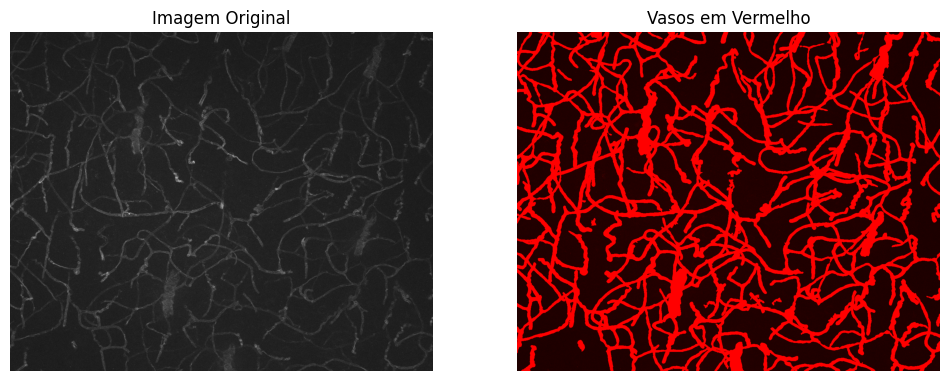

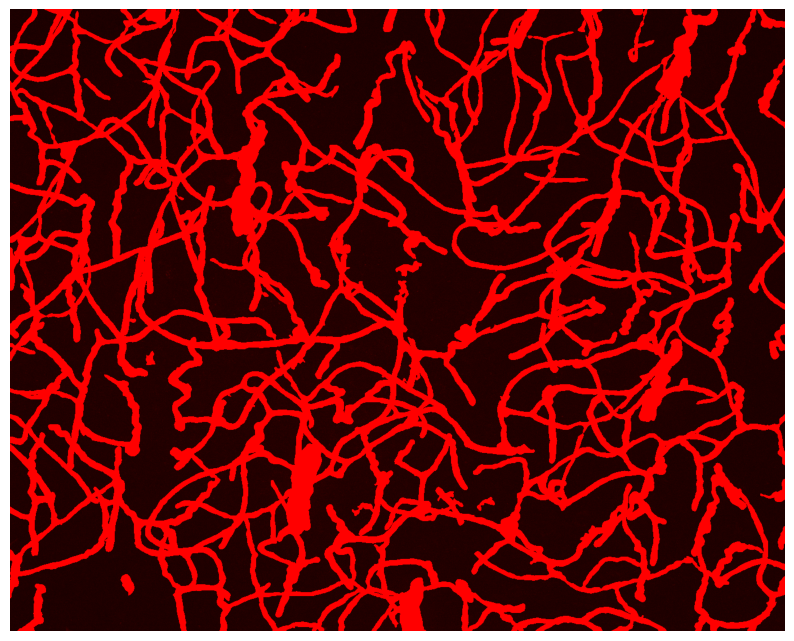

In [19]:
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Caminho para a imagem
# Caminhos dos arquivos
image_path = f"{root_dir}/Images/vessel_data/images/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 1-20X.tiff"

mask_path = f"{root_dir}/Images/vessel_data/labels_20x/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 1-20X.png"



# Abrir a imagem e a máscara
image = Image.open(image_path).convert("RGB")
mask = Image.open(mask_path).convert("L")  # Certificar-se de que a máscara está em escala de cinza

# Converter a máscara para um array numpy
mask_np = np.array(mask)

# Criar uma imagem em vermelho para os vasos usando a máscara
red_vessels = np.zeros((mask_np.shape[0], mask_np.shape[1], 3), dtype=np.uint8)
red_vessels[mask_np > 50] = [255, 0, 0]  # Usar um threshold para definir os vasos

# Converter a imagem original para um array numpy
image_np = np.array(image)

# Garantir que a imagem original é RGB
if len(image_np.shape) == 2 or image_np.shape[2] == 1:
    image_np = np.stack((image_np,) * 3, axis=-1)

# Aplicar os vasos vermelhos na imagem original
highlighted_image_np = np.where(red_vessels == [255, 0, 0], red_vessels, image_np)

# Converter o array numpy de volta para uma imagem
highlighted_image = Image.fromarray(highlighted_image_np)

# Mostrar a imagem original e a imagem com os vasos em vermelho
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, "gray")
ax[0].set_title("Imagem Original")
ax[0].axis("off")

ax[1].imshow(highlighted_image)
ax[1].set_title("Vasos em Vermelho")
ax[1].axis("off")

plt.show()


plt.figure(figsize=[10, 10])
plt.imshow(highlighted_image, 'gray')
plt.axis('off')
plt.savefig('highlighted_image.svg', format='svg')
plt.show()
